In [44]:
import json

all_results = {}

for i in range(1,10):
    path = f"errCorr_trial{i}/testingSetScores.json"
    with open(path, "r") as f:
        results = json.load(f)
        all_results[f"trial{i}"] = results

In [45]:
prompt_deltas = {}

for trial in all_results:
    for k,v in all_results[trial].items():
        initial_score = next(iter(v["initial_prompt"].values()))
        optimized_score = next(iter(v["optimized_prompt"].values()))
        prompt_deltas[k] = prompt_deltas.get(k, []) + [optimized_score - initial_score]
        
print(prompt_deltas)

{'Please format the following raw transcript for readability, including punctuation, speaker labels (look for semicolons after names), and spacing. Remove filler words:\n\nPLACEHOLDER\n': [3.3940579623073894, 6.181859061992075, 13.492420557644422, 24.28426339538653, 17.764319042265633, 25.790253614209867, 20.218534641985322, 3.2526322043122278, 16.843341630766982], 'You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\nPLACEHOLDER': [0.04411803867979813, -0.004994822781995367, 3.081184036829157, 0.11534852519837102, 22.72490660930258, 15.978317742268572, -0.04268756991977796, 8.90977988600116, 9.099446434807291], 'Correct the grammar in the sen

### Variance of Prompts Improvements

##### **Llama3, Over 3 Trials**

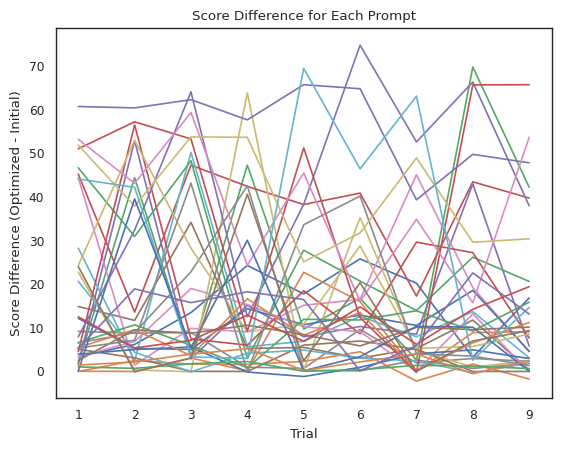

{16606: 'Please format the following raw transcript for readability, including punctuation, speaker labels (look for semicolons after names), and spacing. Remove filler words:\n\nPLACEHOLDER\n',
 38389: 'You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\nPLACEHOLDER',
 4228: 'Correct the grammar in the sentence: PLACEHOLDER',
 40515: 'Reformat the following transcript into Markdown, bolding the speakers. Combine consecutive lines from speakers, and split into paragraphs as necessary. Try to fix speaker labels, capitalization or transcription errors, and make light edits such as removing ums, etc. There is some Danish, please italicize the Da

In [46]:
from matplotlib import ticker
import matplotlib.pyplot as plt

encodings = {}
def encode(prompt): 
    res = sum(list(map(lambda x: ord(x), list(prompt))))
    encodings[res] = prompt
    return res
decode = lambda encoding: encodings[encoding]

for prompt in prompt_deltas:
    plt.plot(range(1,10), prompt_deltas[prompt], label=encode(prompt))
# plt.legend(loc='lower left')
plt.xlabel("Trial")
plt.ylabel("Score Difference (Optimized - Initial)")
plt.title("Score Difference for Each Prompt")
# Set x-axis to display integers only
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()
encodings

In [47]:
import numpy as np
import pandas as pd

variances = {}

for prompt in prompt_deltas:
    variances[prompt] = np.var(prompt_deltas[prompt])

variances = pd.Series(variances)
variances.sort_values(ascending=False, inplace=True)
print(f"Highest to lowest delta variance: \n{variances}")

Highest to lowest delta variance: 
1. I want you to be a grammar checker similar to QuillBot and Grammarly.\n2. You should be capable of identifying and correcting grammatical errors in a given text.)\n3. You should provide suggestions for corrections, offering alternatives to improve sentence structure, word choice, and overall grammar.\n4. The output should maintain the context and meaning of the original text while addressing the identified errors.\n5. Produce only plain text output, without any additional elements.\n\ntext:\n{TEXT}                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

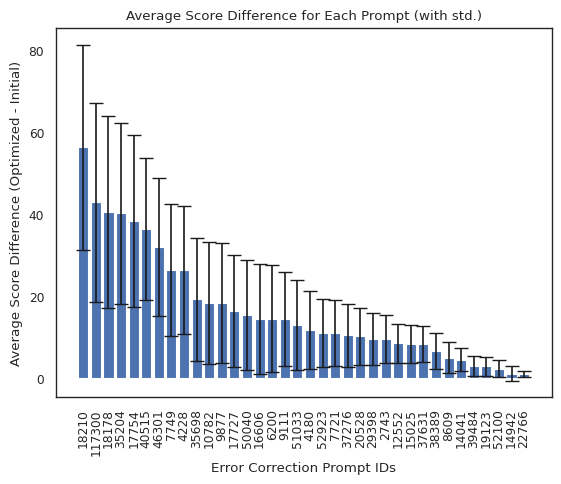

In [48]:
# Plot average delta for each prompt with error bars
averages = {}
for prompt in prompt_deltas:
    averages[prompt] = np.mean(prompt_deltas[prompt])
    
averages = pd.Series(averages)
averages.sort_values(ascending=False, inplace=True)
# print(f"Highest to lowest delta average: \n{averages}")

plt.bar(range(len(averages)), averages, yerr=np.sqrt(variances), capsize=5)
plt.xticks(range(len(averages)), [encode(prompt) for prompt in averages.index], rotation=90)
plt.xlabel("Error Correction Prompt IDs")
plt.ylabel("Average Score Difference (Optimized - Initial)")
plt.title("Average Score Difference for Each Prompt (with std.)")
plt.show()

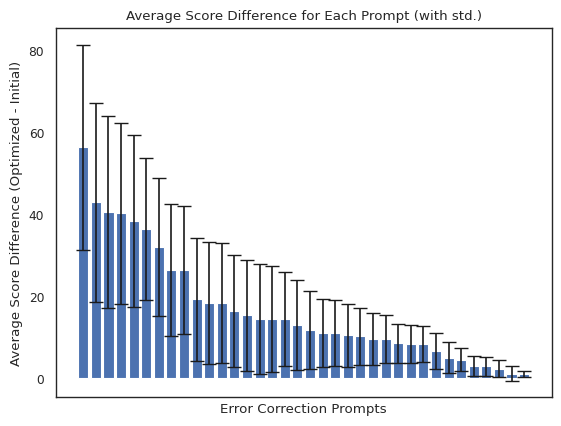

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average delta for each prompt with error bars
averages = {}
for prompt in prompt_deltas:
    averages[prompt] = np.mean(prompt_deltas[prompt])
    
averages = pd.Series(averages)
averages.sort_values(ascending=False, inplace=True)
# print(f"Highest to lowest delta average: \n{averages}")

sns.set_theme(context='paper', style='white')
plt.bar(range(len(averages)), averages, yerr=np.sqrt(variances), capsize=5)
# sns.barplot(x=len(averages), y=averages, yerr=np.sqrt(variances))
# plt.xticks(range(len(averages)), [encode(prompt) for prompt in averages.index], rotation=90)
# plt.xlabel("Error Correction Prompt IDs")
plt.xticks([])  # Remove x-tick values
plt.xlabel("Error Correction Prompts")
plt.ylabel("Average Score Difference (Optimized - Initial)")
plt.title("Average Score Difference for Each Prompt (with std.)")
plt.show()